# **Linear Regression from Scratch**
This notebook implements Linear Regression from scratch using NumPy.

## **1. Importing Libraries**
We import necessary libraries: NumPy for computations, Pandas for data handling, and Matplotlib for visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Initializing Data**
We create a simple dataset for regression, where `X_data` represents the input feature and `Y_data` represents the target variable.

In [ ]:
data = np.array([[3,2],[6,5],[4,4],[7,7],[10,7],[12,10],[11,11],[9,9]])
X_data = data[:,0]
Y_data = data[:,1]

## **3. Implementing Linear Regression**
We define a `LinearRegression` class with methods for training (gradient descent) and prediction.

In [ ]:
class LinearRegression:
  def __init__(self):
    self.w = 0 # Initialize like instance specific weights
    self.b = 0
    self.mean_X = None
    self.std_X = None
    self.mean_y = None
    self.std_y = None

  def fit(self, X, y, learning_rate=0.01, epochs=1000):

    # Feature Scaling

    self.mean_X = np.mean(X, axis=0)
    self.std_X = np.std(X, axis=0)
    X = (X - self.mean_X) / self.std_X # Standardize feature variables

    self.mean_y = np.mean(y)
    self.std_y = np.std(y)
    y = (y - self.mean_y) / self.std_y # Standardize target variable

    w_std = 1  # Initialize standard weight
    b_std = 1  # Initialize standard bias

    for i in range(epochs):
        y_pred = w_std * X + b_std  # Compute predictions

        # Compute gradients
        b_std = b_std - learning_rate * np.mean(y_pred - y)  # Update bias
        w_std = w_std - learning_rate * np.mean((y_pred - y) * X)  # Update weight

        # Compute MSE loss (print every 100 iterations for debugging)
        # if i % 100 == 0:
        #     mse = np.mean((y - y_pred) ** 2)
        #     print(f"Iteration {i}: MSE = {mse}")

    # Final prediction after training
    y_pred = w_std * X + b_std

    # Final MSE after training
    mse = np.mean((y - y_pred) ** 2)

    # De-standardize weights and bias
    self.w = w_std * (self.std_y / self.std_X)
    self.b = self.mean_y - np.dot(self.mean_X, self.w) + (b_std * self.std_y)

    print("Final MSE:", mse)
    print("Final weight:", self.w)
    print("Final bias:", self.b)

  def predict(self, X):
    return self.w * X + self.b

  def get_weights(self):
    return self.w, self.b

  def set_weights(self, w, b):
    self.w = w
    self.b = b

  def get_mse(self, y_pred, y):
    return np.mean((y - y_pred) ** 2)

  def get_loss(self, y_pred, y):
    return y_pred - y

## **4. Training the Model**
We fit our model to the data and extract the learned parameters (weight and bias).

In [ ]:
model = LinearRegression()

model.fit(X_data, Y_data)

w, b = model.get_weights()
print("Weight:", w)
print("Bias:", b)

y_pred = model.predict(X_data)
print("Predictions for X_data:", y_pred)

Final MSE: 0.11754657611087065
Final weight: 0.8841084228875042
Final bias: 0.023284541852544444
Weight: 0.8841084228875042
Bias: 0.023284541852544444
Predictions for X_data: [ 2.67560981  5.32793508  3.55971823  6.2120435   8.86436877 10.63258562
  9.74847719  7.98026035]


## **5. Visualizing the Results**
We plot the original data points and the predicted regression line.

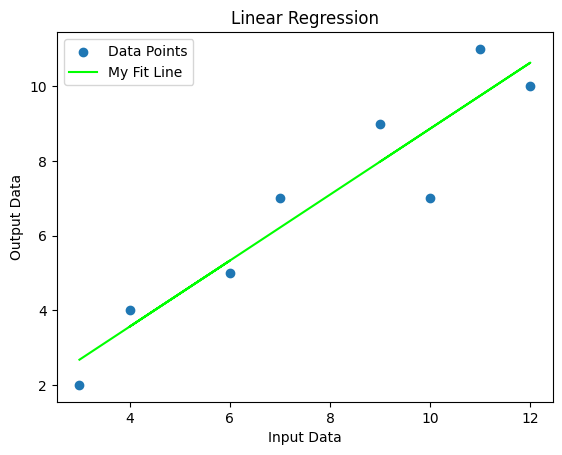

In [ ]:
plt.scatter(X_data,Y_data)
plt.plot(X_data, y_pred, color = 'lime')
plt.xlabel('Input Data')
plt.ylabel('Output Data')
plt.title('Linear Regression')
plt.legend(['Data Points','My Fit Line'])
plt.show()

## **6. Multiple Linear Regression**
We extend our linear regression implementation to handle multiple features.

In [ ]:
class multivariate_LinearRegression(LinearRegression):
  def __init__(self):
    super().__init__()

  def fit(self, X, y, learning_rate=0.00001, epochs=100000):

    # Feature Scaling

    self.mean_X = np.mean(X, axis=0)
    self.std_X = np.std(X, axis=0)
    X = (X - self.mean_X) / self.std_X # Standardize feature variables

    self.mean_y = np.mean(y)
    self.std_y = np.std(y)
    y = (y - self.mean_y) / self.std_y # Standardize target variable

    n_features = 1 if len(X.shape) == 1 else X.shape[1]
    n = X.shape[0]
    self.w = np.ones(n_features)
    self.b = 0

    for i in range(epochs):
        y_pred = np.dot(X, self.w) + self.b

        self.b = self.b - learning_rate * np.mean(y_pred - y)
        self.w = self.w - learning_rate * np.dot(X.T, (y_pred - y)) / n

        # if i % 1000 == 0:
        #     mse = np.mean((y - y_pred) ** 2)
        #     print(f"Iteration {i}: MSE = {mse}")

    y_pred = np.dot(X, self.w) + self.b
    mse = np.mean((y - y_pred) ** 2)

    # De-standardize weights and bias
    self.w = self.w * (self.std_y / self.std_X)
    self.b = self.mean_y - np.dot(self.mean_X, self.w) + (self.b * self.std_y)

    print("Final MSE:", mse)
    print("Final weight:", self.w)
    print("Final bias:", self.b)

  def predict(self, X):
    return np.dot(X, self.w) + self.b


## **7. Loading and Preparing Dataset**
We load a CSV dataset for multiple linear regression and examine its structure.

In [ ]:
mdata = pd.read_csv('multiple_linear_regression_dataset.csv')
mdata

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [ ]:
mdata = mdata.to_numpy()
x_mdata = mdata[:,:-1]
y_mdata = mdata[:,-1]

In [ ]:
X1 = x_mdata[:,0]
X2 = x_mdata[:,1]

In [ ]:
x_mdata.shape

(20, 2)

## **8. Training and Evaluating Multiple Linear Regression**
We apply our model to multiple features and analyze performance.

In [ ]:
mmodel = multivariate_LinearRegression()
mmodel.fit(x_mdata, y_mdata)

Final MSE: 0.1815785557537078
Final weight: [ 326.00087849 1560.40866568]
Final bias: 18135.03144065041


In [ ]:
y_pred = mmodel.predict(x_mdata)
np.mean((y_pred - y_mdata)**2)

np.float64(12287180.230872396)

In [ ]:
y_pred

array([27845.46206858, 32596.28379239, 36577.89006104, 36369.10288073,
       47757.15587253, 45683.93690341, 35065.09936677, 35134.69509354,
       37999.10727318, 43332.33502721, 29149.46558254, 47500.75072081,
       43541.12220751, 41002.71090636, 51203.97408238, 40863.51945283,
       63570.02970965, 27193.4603116 , 46522.74808534, 45801.15060159])

In [ ]:
y_mdata

array([30450, 35670, 31580, 40130, 47830, 41630, 41340, 37650, 40250,
       45150, 27840, 46110, 36720, 34800, 51300, 38900, 63600, 30870,
       44190, 48700])

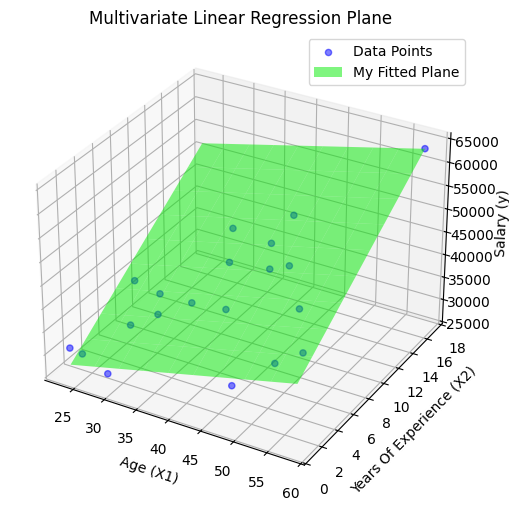

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual points
ax.scatter(X1, X2, y_mdata, label="Data Points", color="blue", alpha=0.5)

# Create a mesh grid for the plane
X1_range = np.linspace(X1.min(), X1.max(), 10)
X2_range = np.linspace(X2.min(), X2.max(), 10)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)
y_pred_grid = mmodel.b + mmodel.w[0] * X1_grid + mmodel.w[1] * X2_grid

# Plot the regression plane
ax.plot_surface(X1_grid, X2_grid, y_pred_grid, color="lime", alpha=0.5, label= 'My Fitted Plane')

ax.set_xlabel("Age (X1)")
ax.set_ylabel("Years Of Experience (X2)")
ax.set_zlabel("Salary (y)")
ax.set_title("Multivariate Linear Regression Plane")

plt.legend()
plt.show()


## **9. Conclusion**
This notebook demonstrated how to implement linear regression from scratch, including both simple and multiple linear regression and feature scaling. Further improvements can include regularization, and optimization techniques.